### Módulo 2: Treinar seu primero modelo, Fashion MINIST

O objetivo aqui é treinar um modelo para identificar diferentes peças de roupas.

In [1]:
import tensorflow as tf

2023-02-04 22:27:33.047947: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-04 22:27:36.886579: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-04 22:27:36.886607: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-04 22:27:47.443635: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [2]:
# Import TensorFlow Datasets
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

# Helper libraries
import math
import numpy as np
import matplotlib.pyplot as plt

/home/edu/.local/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [19]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [20]:
class_names = metadata.features['label'].names
print("Class names: {}".format(class_names))

Class names: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [21]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("Número de exemplos de treino: {}".format(num_train_examples))
print("número de exemplos de teste:     {}".format(num_test_examples))

Número de exemplos de treino: 60000
número de exemplos de teste:     10000


In [22]:
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

# The map function applies the normalize function to each element in the train
# and test datasets
train_dataset =  train_dataset.map(normalize)
test_dataset  =  test_dataset.map(normalize)


#train_dataset =  train_dataset.cache()
#test_dataset  =  test_dataset.cache()

Vamos ver como uma imagem se parece:

2023-02-04 22:31:48.994606: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


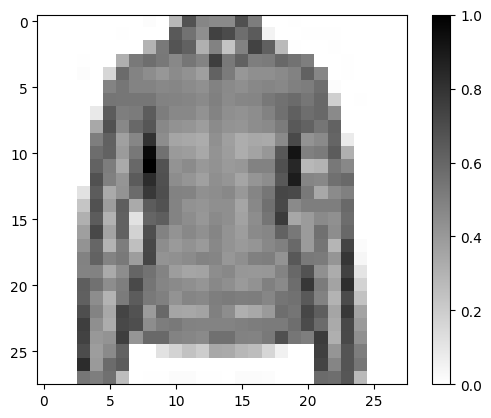

In [23]:
# Take a single image, and remove the color dimension by reshaping
for image, label in test_dataset.take(1):
  break
image = image.numpy().reshape((28,28))

# Plot the image - voila a piece of fashion clothing
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

### Construir o Modelo

Para treinar um modelo primeiro precisamos definir sua arquitetura, e então compilar e depois treinar.

A definição da arquitetura acontece definindo as camadas e os neurônios - faremos isso usando a Sequential API. Depois, ao compilar, definiremos a função de perda e o otimizador. No treinamento daremos o fit entre os dados de treino e o rótulo para que, usando o otimizador, se reduza a perda (calculada na função de perda.)

In [24]:

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)), #camada inicial: 28x28 e 1 canal ( tons de cinza), 1 neurônio por pixel, então 
    tf.keras.layers.Dense(128, activation=tf.nn.relu),# camada oculta, 128 neurônios usando relu como função de ativação
    tf.keras.layers.Dense(10, activation=tf.nn.softmax) # como são 10 classes de saída então é um sofmax como função de ativação com 10 neurônios
])

Agora vamos compilar o modelo: para issi definiremos a função de perda e o otimizador, além da métrica usada para monitorar o desempenho geral do modelo. Usaremos acurácia.

In [25]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(), #isso pq é uma classificação excludente
              metrics=['accuracy'])

In [26]:
BATCH_SIZE = 16
train_dataset = train_dataset.cache().repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.cache().batch(BATCH_SIZE)


In [27]:

model.fit(train_dataset, epochs=5, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/5
3750/3750 [==============================] - 12s 3ms/step - loss: 0.4827 - accuracy: 0.8283
Epoch 2/5
3750/3750 [==============================] - 10s 3ms/step - loss: 0.3656 - accuracy: 0.8679
Epoch 3/5
3750/3750 [==============================] - 10s 3ms/step - loss: 0.3268 - accuracy: 0.8813
Epoch 4/5
3750/3750 [==============================] - 10s 3ms/step - loss: 0.3030 - accuracy: 0.8872
Epoch 5/5
3750/3750 [==============================] - 10s 3ms/step - loss: 0.2896 - accuracy: 0.8931


Agora vamos avaliar a acurácia:

In [28]:
test_loss, test_accuracy = model.evaluate(test_dataset)
print('Acurácia no testset', test_accuracy)

625/625 [==============================] - 1s 1ms/step - loss: 0.3518 - accuracy: 0.8747
Acurácia no testset 0.8747000098228455


Em seguida vamos fazer algumas previsões/inferências:

In [29]:
for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

1/1 [==============================] - 0s 492ms/step


In [30]:
predictions.shape

(16, 10)

In [31]:
np.argmax(predictions[0])

4

In [32]:
test_labels[0]

4

In [33]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

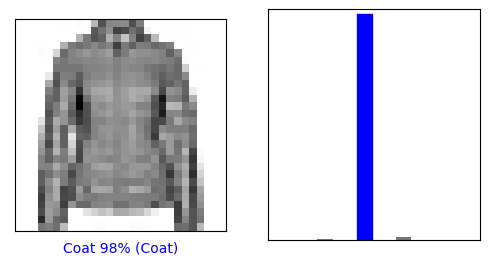

In [34]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

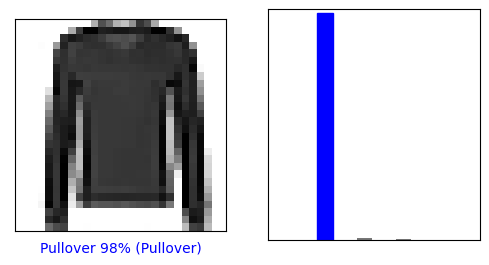

In [35]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

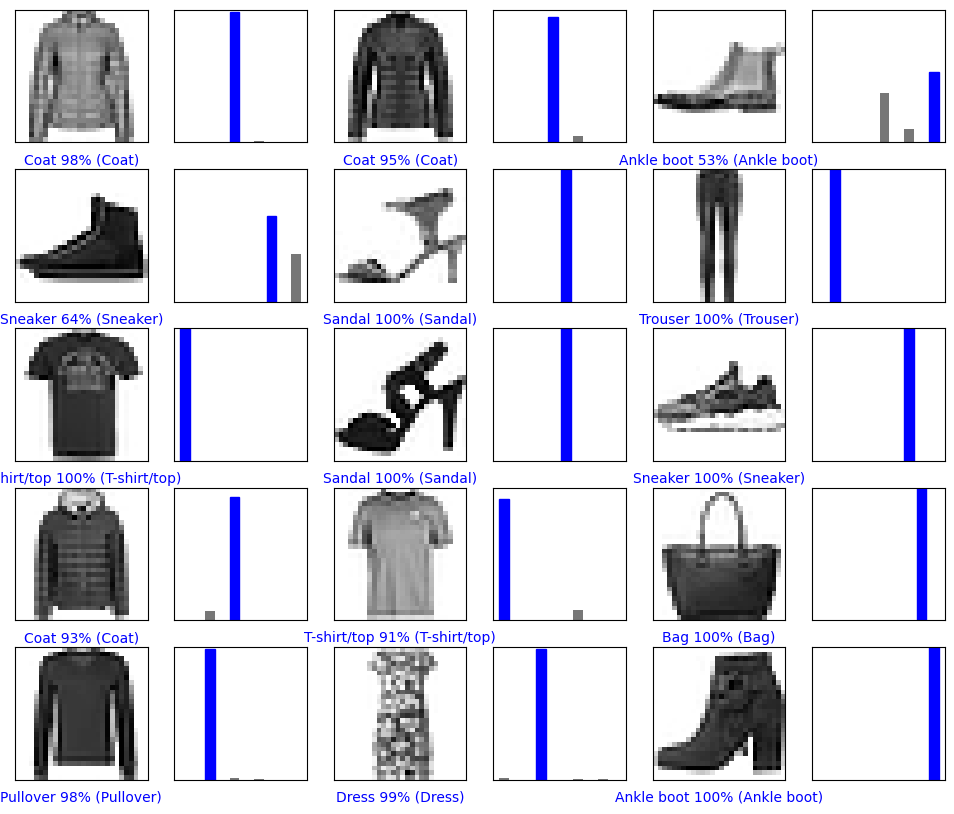

In [36]:
# imprime algumas imagens, sendo azul as previsões corretas e vermelho as incorretas
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)


In [37]:
# vamos agora fazer a previsão de uma imagem individualmente considerada
img = test_images[0]

print(img.shape)

(28, 28, 1)


In [38]:
img = np.array([img])

print(img.shape)

(1, 28, 28, 1)


In [39]:
predictions_single = model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 43ms/step
[[6.9203652e-06 2.1923202e-07 6.2245526e-03 7.8389817e-08 9.8027712e-01
  9.9460828e-11 1.3489111e-02 4.7792039e-08 1.9389245e-06 1.1668968e-09]]


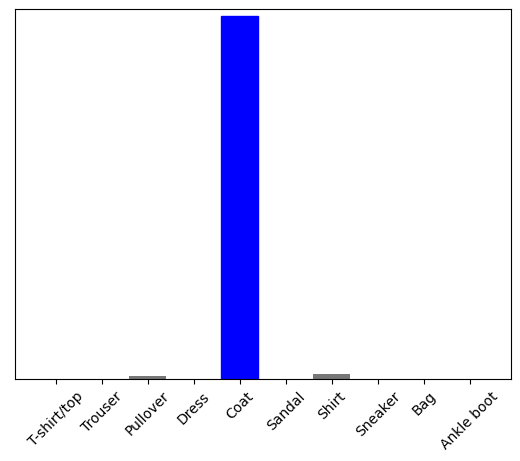

In [40]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [41]:
np.argmax(predictions_single[0])

4

#### Exercises

Experiment with different models and see how the accuracy results differ. In particular change the following parameters:

1. Set training epochs set to 1
2. Number of neurons in the Dense layer following the Flatten one. For example, go really low (e.g. 10) in ranges up to 512 and see how accuracy changes
3. Add additional Dense layers between the Flatten and the final Dense(10), experiment with different units in these layers
4. Don't normalize the pixel values, and see the effect that has

##### 1. Efeito das épocas :

In [42]:
print('Acurácia no testset', test_accuracy)

Acurácia no testset 0.8747000098228455


In [43]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)), #camada inicial: 28x28 e 1 canal ( tons de cinza), 1 neurônio por pixel, então 
    tf.keras.layers.Dense(128, activation=tf.nn.relu),# camada oculta, 128 neurônios usando relu como função de ativação
    tf.keras.layers.Dense(10, activation=tf.nn.softmax) # como são 10 classes de saída então é um sofmax como função de ativação com 10 neurônios
])

In [44]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(), #isso pq é uma classificação excludente
              metrics=['accuracy'])

In [30]:
#BATCH_SIZE = 16
#train_dataset = train_dataset.cache().repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
#test_dataset = test_dataset.cache().batch(BATCH_SIZE)

In [45]:

model.fit(train_dataset, epochs=1, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

3750/3750 [==============================] - 11s 3ms/step - loss: 0.4833 - accuracy: 0.8274


In [46]:
test_loss, test_accuracy = model.evaluate(test_dataset)
print('Acurácia no testset', test_accuracy)

625/625 [==============================] - 1s 1ms/step - loss: 0.4073 - accuracy: 0.8511
Acurácia no testset 0.8511000275611877


Com menos épocas o modelo não chegou na acurácia total que poderia: atingiu 82 % enquanto poderia chegar a 87% em 5 épocas.

### 2. Efeito do número de neurônios
Vamos testar 10, 50, 250 e 500.

In [48]:
neuronios = [10,50,250,500]


for n_neuronios in neuronios :
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28, 1)), #camada inicial: 28x28 e 1 canal ( tons de cinza), 1 neurônio por pixel, então 
        tf.keras.layers.Dense(n_neuronios, activation=tf.nn.relu),# camada oculta, X neurônios usando relu como função de ativação
        tf.keras.layers.Dense(10, activation=tf.nn.softmax) # como são 10 classes de saída então é um sofmax como função de ativação com 10 neurônios
    ])
    model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(), #isso pq é uma classificação excludente
              metrics=['accuracy'])

    model.fit(train_dataset, epochs=5, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))
    test_loss, test_accuracy = model.evaluate(test_dataset)
    print('acurácia {} neuronios : {} '.format(n_neuronios, test_accuracy))

Epoch 1/5
3750/3750 [==============================] - 7s 2ms/step - loss: 0.6149 - accuracy: 0.7915
Epoch 2/5
3750/3750 [==============================] - 5s 1ms/step - loss: 0.4575 - accuracy: 0.8395
Epoch 3/5
3750/3750 [==============================] - 5s 1ms/step - loss: 0.4309 - accuracy: 0.8507
Epoch 4/5
3750/3750 [==============================] - 5s 1ms/step - loss: 0.4145 - accuracy: 0.8546
Epoch 5/5
625/625 [==============================] - 1s 1ms/step - loss: 0.4749 - accuracy: 0.8313
acurácia 10 neuronios : 0.8313000202178955 
Epoch 1/5
3750/3750 [==============================] - 8s 2ms/step - loss: 0.5156 - accuracy: 0.8202
Epoch 2/5
3750/3750 [==============================] - 7s 2ms/step - loss: 0.3869 - accuracy: 0.8611
Epoch 3/5
3750/3750 [==============================] - 7s 2ms/step - loss: 0.3550 - accuracy: 0.8706
Epoch 4/5
3750/3750 [==============================] - 7s 2ms/step - loss: 0.3278 - accuracy: 0.8798
Epoch 5/5
625/625 [==============================

Aumentar os neurônios em geral aumenta a acurácia.

#### 3. Efeitos das Dense Layers

Vamos testar o efeito de adicionar camadas, mantenho fixo o número de neurônios.

In [54]:
neuronios = 500
camadas = [1,2,4,5]

for n_camadas in camadas:
    print('número de camadas ',n_camadas)
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten(input_shape=(28, 28, 1)))
    #camada inicial: 28x28 e 1 canal ( tons de cinza), 1 neurônio por pixel, então
    for i in range(1,n_camadas+1):
        print('camada oculta ', i)
        model.add(tf.keras.layers.Dense(neuronios/n_camadas, activation=tf.nn.relu))# camada oculta, X neurônios usando relu como função de ativação
    model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax)) # como são 10 classes de saída então é um sofmax como função de ativação com 10 neurônios
    
    model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(), #isso pq é uma classificação excludente
              metrics=['accuracy'])

    model.fit(train_dataset, epochs=5, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))
    test_loss, test_accuracy = model.evaluate(test_dataset)
    print('acurácia {} neuronios : {} '.format(n_neuronios, test_accuracy))

número de camadas  1
camada oculta  1
Epoch 1/5
3750/3750 [==============================] - 29s 8ms/step - loss: 0.4711 - accuracy: 0.8297
Epoch 2/5
3750/3750 [==============================] - 29s 8ms/step - loss: 0.3556 - accuracy: 0.8702
Epoch 3/5
3750/3750 [==============================] - 31s 8ms/step - loss: 0.3213 - accuracy: 0.8803
Epoch 4/5
3750/3750 [==============================] - 31s 8ms/step - loss: 0.2958 - accuracy: 0.8901
Epoch 5/5
625/625 [==============================] - 1s 2ms/step - loss: 0.3612 - accuracy: 0.8717
acurácia 500 neuronios : 0.8716999888420105 
número de camadas  2
camada oculta  1
camada oculta  2
Epoch 1/5
3750/3750 [==============================] - 25s 6ms/step - loss: 0.4721 - accuracy: 0.8285
Epoch 2/5
3750/3750 [==============================] - 23s 6ms/step - loss: 0.3579 - accuracy: 0.8682
Epoch 3/5
3750/3750 [==============================] - 27s 7ms/step - loss: 0.3263 - accuracy: 0.8797
Epoch 4/5
3750/3750 [============================

Mantendo o número constante de neurônios e aumentando o número de camadas existiu uma oscilação na acurácia do testset.

### 4. Efeito da não normalização dos pixels



In [55]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [57]:
BATCH_SIZE = 16
train_dataset = train_dataset.cache().repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.cache().batch(BATCH_SIZE)

In [58]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)), #camada inicial: 28x28 e 1 canal ( tons de cinza), 1 neurônio por pixel, então 
    tf.keras.layers.Dense(128, activation=tf.nn.relu),# camada oculta, X neurônios usando relu como função de ativação
    tf.keras.layers.Dense(10, activation=tf.nn.softmax) # como são 10 classes de saída então é um sofmax como função de ativação com 10 neurônios
])
model.compile(optimizer='adam',
            loss=tf.keras.losses.SparseCategoricalCrossentropy(), #isso pq é uma classificação excludente
            metrics=['accuracy'])

model.fit(train_dataset, epochs=5, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))
test_loss, test_accuracy = model.evaluate(test_dataset)
print('acurácia {} neuronios : {} '.format(n_neuronios, test_accuracy))

Epoch 1/5
3750/3750 [==============================] - 12s 3ms/step - loss: 2.4794 - accuracy: 0.7038
Epoch 2/5
3750/3750 [==============================] - 9s 2ms/step - loss: 0.6975 - accuracy: 0.7523
Epoch 3/5
3750/3750 [==============================] - 9s 2ms/step - loss: 0.6207 - accuracy: 0.7840
Epoch 4/5
3750/3750 [==============================] - 10s 3ms/step - loss: 0.5969 - accuracy: 0.7950
Epoch 5/5
625/625 [==============================] - 1s 2ms/step - loss: 0.6340 - accuracy: 0.7968
acurácia 500 neuronios : 0.7968000173568726 


Baixou bem a acurácia! Então deixar entre 0 e 1 realmente ajuda.